<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Ajuste_Distribucion_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import exponweib
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


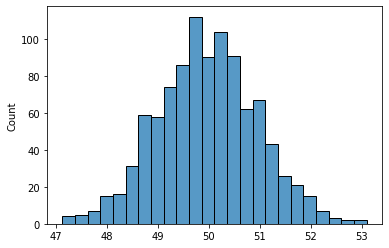

In [ ]:
#Graficando un histograma
np.random.seed(2020)

#Simular proceso de producción de snacks de 50 gramos [47,53] en 1000 bolsas de snack
mu,sigma = 50,1
gramaje =  np.random.normal(mu,sigma,1000)
sns.histplot(data = gramaje)


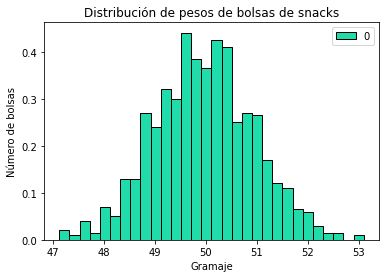

In [ ]:
#Colores RGB o RGBA
datos = pd.DataFrame(gramaje)
datos.index = np.arange(1,1001)
datos.plot(kind = 'hist', edgecolor = 'black', bins = 30, color = '#20DCAB', label = 'Histograma', density = 10, cumulative = 0)
plt.title("Distribución de pesos de bolsas de snacks")
plt.xlabel("Gramaje")
plt.ylabel("Número de bolsas")
plt.legend(loc = 'best')
plt.show()

Test de Hippótesis de Medias

In [ ]:
# Estadístico de prueba: función ztest
ztest(gramaje, value = 50) #p-value >0.05 que tenga media mayor a 50

(-1.084781642995876, 0.2780183777584947)

Gráficas esperadas o modelos teóricos

In [ ]:
#ordenamos los datos de mayor a menor
gramaje = np.sort(gramaje)

Obteniendo os parámetros de distribución

In [ ]:
# Ajustamos a distribución normal y nos devuelve los parámetros (media, std)
#Usar función getattr(): getattr(stats,"norm")
#Ajustar a la distribucion: dist.fit(datos)
dist = getattr( stats, 'norm')
parametros = dist.fit(gramaje)
media = "La media es {}"
desviacion = "la desviación estándar es {}"
print(media.format(parametros[0]), " y ", desviacion.format(parametros[1]))

La media es 49.96655861368413  y  la desviación estándar es 0.9743717627808806


Pruebas de bondad de ajuste

In [ ]:
stats.kstest(gramaje,"norm",parametros)

KstestResult(statistic=0.017067509554457794, pvalue=0.9327620070096921)

Función de densidad con el modelo normal

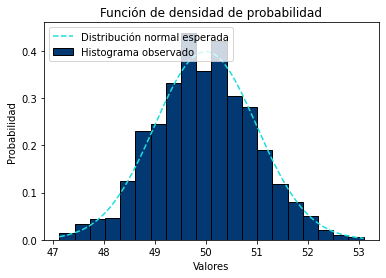

In [ ]:
#Gráfico de una funció normal ajustada a los datos
x = gramaje
dnormal = stats.norm(mu,sigma).pdf(x)

#gráfica de densidad
graf_distribuido = plt.hist(x,bins = 20, density = 1, label = "Histograma observado", cumulative = 0, color = '#023973', edgecolor = 'black')
plt.plot(x, dnormal, label = 'Distribución normal esperada', ls = '--', color = '#1FDDDA')
plt.title('Función de densidad de probabilidad')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.legend(loc = 2)
plt.show()

In [ ]:
# cual es la probabilidad de comprar bolsas de snack menor a 49g
stats.norm(mu,sigma).cdf(49) # Es como una

0.15865525393145707

In [ ]:
# cual es la probabilidad de comprar bolsas de snack mayor a 52g
1 - stats.norm(mu,sigma).cdf(52)

0.02275013194817921

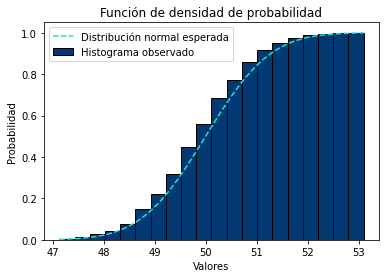

In [ ]:
# Ajustar a la distribución acumulada
#gráfica de densidad
dnormalacumulado = stats.norm(mu,sigma).cdf(x)

graf_acumulado = plt.hist(x,bins = 20, density = 1, label = "Histograma observado", cumulative = 1, color = '#023973', edgecolor = 'black')
plt.plot(x, dnormalacumulado, label = 'Distribución normal esperada', ls = '--', color = '#1FDDDA')
plt.title('Función de densidad de probabilidad')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.legend(loc = 2)
plt.show()

In [ ]:
#Alturas de las barras
graf_distribuido[0]

array([0.0134001 , 0.03350026, 0.04355033, 0.04690036, 0.12395095,
       0.23115177, 0.24455187, 0.33165253, 0.43885335, 0.35845274,
       0.42210322, 0.30485233, 0.28140215, 0.19095146, 0.1172509 ,
       0.08040061, 0.05025038, 0.02010015, 0.01005008, 0.00670005])

In [ ]:
#Determiinar los valores de x o marcas de clase de los intervalos para calcular el y' del modelo
marcas_clase = np.linspace(x.min(),x.max(),20) #Partiendo en intervalos
distrib_normal = stats.norm(mu,sigma).pdf(marcas_clase) #Ajustar el modelo a las marcas de clase

array([47.12965877, 47.44387475, 47.75809073, 48.07230671, 48.38652269,
       48.70073868, 49.01495466, 49.32917064, 49.64338662, 49.9576026 ,
       50.27181858, 50.58603456, 50.90025055, 51.21446653, 51.52868251,
       51.84289849, 52.15711447, 52.47133045, 52.78554643, 53.09976242])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MSE = mean_squared_error(graf_distribuido[0],distrib_normal)
MAE = mean_absolute_error(graf_distribuido[0],distrib_normal)
mensaje = 'El Error cuadrático medio es: {} y la media del error absoluto es {}'
print(mensaje.format(MSE, MAE))


El Error cuadrático medio es: 0.0006671994176845405 y la media del error absoluto es 0.0180889907398829
